## Part 1 - Calculations

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Define the data points
points = np.array([
    [3, 6],  # A1
    [6, 3],  # A2
    [8, 6],  # A3
    [2, 1],  # A4
    [5, 9]   # A5
])

# Initial centroids (A2 and A4)
initial_centroids = np.array([
    [6, 3],  # C1 (A2)
    [2, 1]   # C2 (A4)
])


In [10]:
# Function to calculate Euclidean distance
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Assign points to clusters based on distance to initial centroids
cluster_labels = []
for point in points:
    dist_to_c1 = euclidean_distance(point, initial_centroids[0])
    dist_to_c2 = euclidean_distance(point, initial_centroids[1])
    cluster_labels.append(0 if dist_to_c1 < dist_to_c2 else 1)
cluster_labels = np.array(cluster_labels)

# Calculate new centroids
cluster1_points = points[cluster_labels == 0]
cluster2_points = points[cluster_labels == 1]
new_centroids = np.array([
    np.mean(cluster1_points, axis=0),
    np.mean(cluster2_points, axis=0)
])

print("\nCluster 1 points:", cluster1_points)
print("New centroid 1:", new_centroids[0])
print("\nCluster 2 points:", cluster2_points)
print("New centroid 2:", new_centroids[1])


Cluster 1 points: [[3 6]
 [6 3]
 [8 6]
 [5 9]]
New centroid 1: [5.5 6. ]

Cluster 2 points: [[2 1]]
New centroid 2: [2. 1.]



Clustering Results:
-----------------
Distances from points to initial centroids:

Point A1 (3, 6):
Distance to C1 (A2): 4.24
Distance to C2 (A4): 5.10
Assigned to Cluster: 1

Point A2 (6, 3):
Distance to C1 (A2): 0.00
Distance to C2 (A4): 4.47
Assigned to Cluster: 1

Point A3 (8, 6):
Distance to C1 (A2): 3.61
Distance to C2 (A4): 7.81
Assigned to Cluster: 1

Point A4 (2, 1):
Distance to C1 (A2): 4.47
Distance to C2 (A4): 0.00
Assigned to Cluster: 2

Point A5 (5, 9):
Distance to C1 (A2): 6.08
Distance to C2 (A4): 8.54
Assigned to Cluster: 1

New centroids:
Cluster 1: (5.50, 6.00)
Cluster 2: (2.00, 1.00)


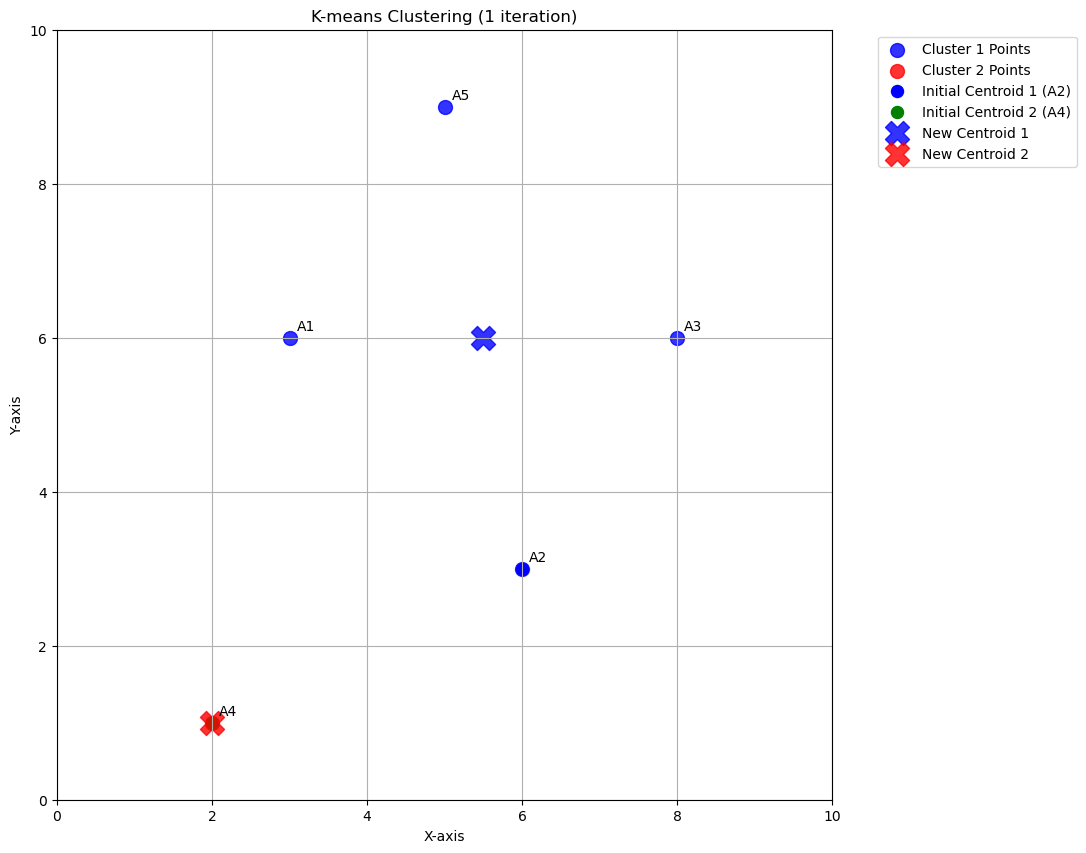

In [11]:
# Create visualization
plt.figure(figsize=(10, 10))
plt.grid(True)

# Plot points for each cluster
plt.scatter(points[cluster_labels == 0][:, 0], points[cluster_labels == 0][:, 1], 
           c='blue', s=100, alpha=0.8, label='Cluster 1 Points')
plt.scatter(points[cluster_labels == 1][:, 0], points[cluster_labels == 1][:, 1], 
           c='red', s=100, alpha=0.8, label='Cluster 2 Points')

# Plot initial centroids with squares
plt.scatter(initial_centroids[0:1, 0], initial_centroids[0:1, 1], 
           c='blue', marker='.', s=300, facecolors='none', 
           label='Initial Centroid 1 (A2)')
plt.scatter(initial_centroids[1:2, 0], initial_centroids[1:2, 1], 
           c='green', marker='.', s=300, facecolors='none', 
           label='Initial Centroid 2 (A4)')

# Plot new centroids with stars and slight offset for Cluster 2
plt.scatter(new_centroids[0:1, 0], new_centroids[0:1, 1], 
           c='blue', marker='X', s=300, alpha=0.8,
           label='New Centroid 1')
plt.scatter(new_centroids[1:2, 0], new_centroids[1:2, 1], 
           c='red', marker='X', s=300, alpha=0.8,
           label='New Centroid 2')

# Add point labels
for i, (x, y) in enumerate(points):
    plt.annotate(f'A{i+1}', (x, y), xytext=(5, 5), textcoords='offset points')

# Set plot limits and labels
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('K-means Clustering (1 iteration)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Print results
print("\nClustering Results:")
print("-----------------")
print("Distances from points to initial centroids:")
for i, point in enumerate(points):
    dist_to_c1 = euclidean_distance(point, initial_centroids[0])
    dist_to_c2 = euclidean_distance(point, initial_centroids[1])
    print(f"\nPoint A{i+1} ({point[0]}, {point[1]}):")
    print(f"Distance to C1 (A2): {dist_to_c1:.2f}")
    print(f"Distance to C2 (A4): {dist_to_c2:.2f}")
    print(f"Assigned to Cluster: {cluster_labels[i] + 1}")

print("\nNew centroids:")
for i, centroid in enumerate(new_centroids):
    print(f"Cluster {i + 1}: ({centroid[0]:.2f}, {centroid[1]:.2f})")

## Part 2 - Programming

In [25]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Read the Excel file
df = pd.read_csv('MCSDatasetNEXTCONLab.csv')

In [26]:
'''Split into test-train sets'''

# Features and target
features = ['Latitude', 'Longitude', 'Hour', 'Minute', 'Duration', 
           'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
X = df[features]
y = df['Legitimacy']

# Split data based on Day values
X_train = X[df['Day'].isin([0, 1, 2])]
X_test = X[df['Day'] == 3]
y_train = y[df['Day'].isin([0, 1, 2])]
y_test = y[df['Day'] == 3]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
# Create and train both models
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=5)  # K = 5

nb_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)

# Make predictions with both models
nb_pred = nb_model.predict(X_test_scaled)
knn_pred = knn_model.predict(X_test_scaled)

# Calculate probabilities
nb_prob = nb_model.predict_proba(X_test_scaled)
knn_prob = knn_model.predict_proba(X_test_scaled)

In [28]:
# Print performance metrics for both models
print("\n=== Naive Bayes Results ===")
print("\nClassification Report:")
print(classification_report(y_test, nb_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, nb_pred))

print("\n=== KNN Results ===")
print("\nClassification Report:")
print(classification_report(y_test, knn_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, knn_pred))

# Save predictions from both models
results_df = pd.DataFrame({
    'Actual': y_test,
    'NB_Predicted': nb_pred,
    'NB_Probability_Class_0': nb_prob[:, 0],
    'NB_Probability_Class_1': nb_prob[:, 1],
    'KNN_Predicted': knn_pred,
    'KNN_Probability_Class_0': knn_prob[:, 0],
    'KNN_Probability_Class_1': knn_prob[:, 1]
})

# Calculate accuracy for both models
nb_accuracy = (nb_pred == y_test).mean()
knn_accuracy = (knn_pred == y_test).mean()

print("\n=== Overall Accuracy ===")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")


=== Naive Bayes Results ===

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.48      0.42       312
           1       0.92      0.89      0.90      2148

    accuracy                           0.83      2460
   macro avg       0.65      0.68      0.66      2460
weighted avg       0.85      0.83      0.84      2460


Confusion Matrix:
[[ 149  163]
 [ 243 1905]]

=== KNN Results ===

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.43      0.45       312
           1       0.92      0.93      0.92      2148

    accuracy                           0.87      2460
   macro avg       0.69      0.68      0.68      2460
weighted avg       0.86      0.87      0.86      2460


Confusion Matrix:
[[ 134  178]
 [ 154 1994]]

=== Overall Accuracy ===
Naive Bayes Accuracy: 0.8350
KNN Accuracy: 0.8650


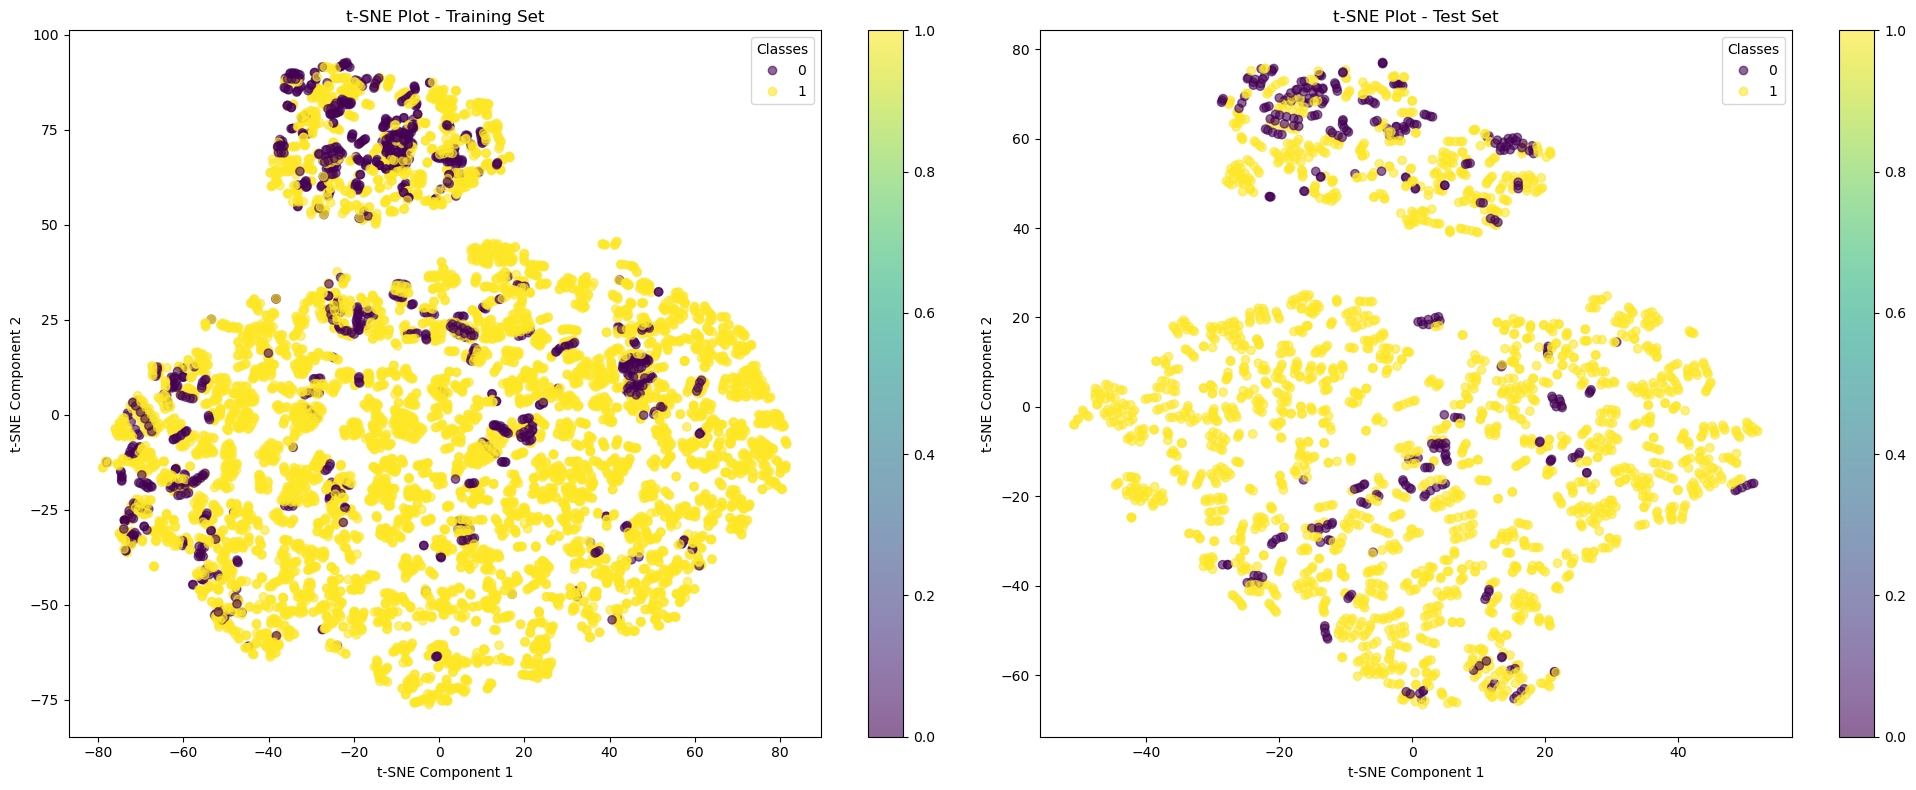

In [29]:
'''TSNE plots'''

# Create t-SNE objects
tsne = TSNE(n_components=2, random_state=0)

# Fit and transform training data
tsne_train = tsne.fit_transform(X_train_scaled)

# Transform test data
tsne_test = TSNE(n_components=2, random_state=0).fit_transform(X_test_scaled)

# Create figure with two subplots
plt.figure(figsize=(20, 8))

# Plot training data
plt.subplot(1, 2, 1)
scatter_train = plt.scatter(tsne_train[:, 0], tsne_train[:, 1], 
                          c=y_train, cmap='viridis', alpha=0.6)
plt.title('t-SNE Plot - Training Set')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter_train)
plt.legend(*scatter_train.legend_elements(), title="Classes")

# Plot test data
plt.subplot(1, 2, 2)
scatter_test = plt.scatter(tsne_test[:, 0], tsne_test[:, 1], 
                         c=y_test, cmap='viridis', alpha=0.6)
plt.title('t-SNE Plot - Test Set')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter_test)
plt.legend(*scatter_test.legend_elements(), title="Classes")

plt.tight_layout()
plt.show()

## Part 3 - Dimensionality Reduction & Analysis

In [23]:
# PCA and Autoencoder to do dimension reduction
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

77/77 [==============================] - 0s 691us/step


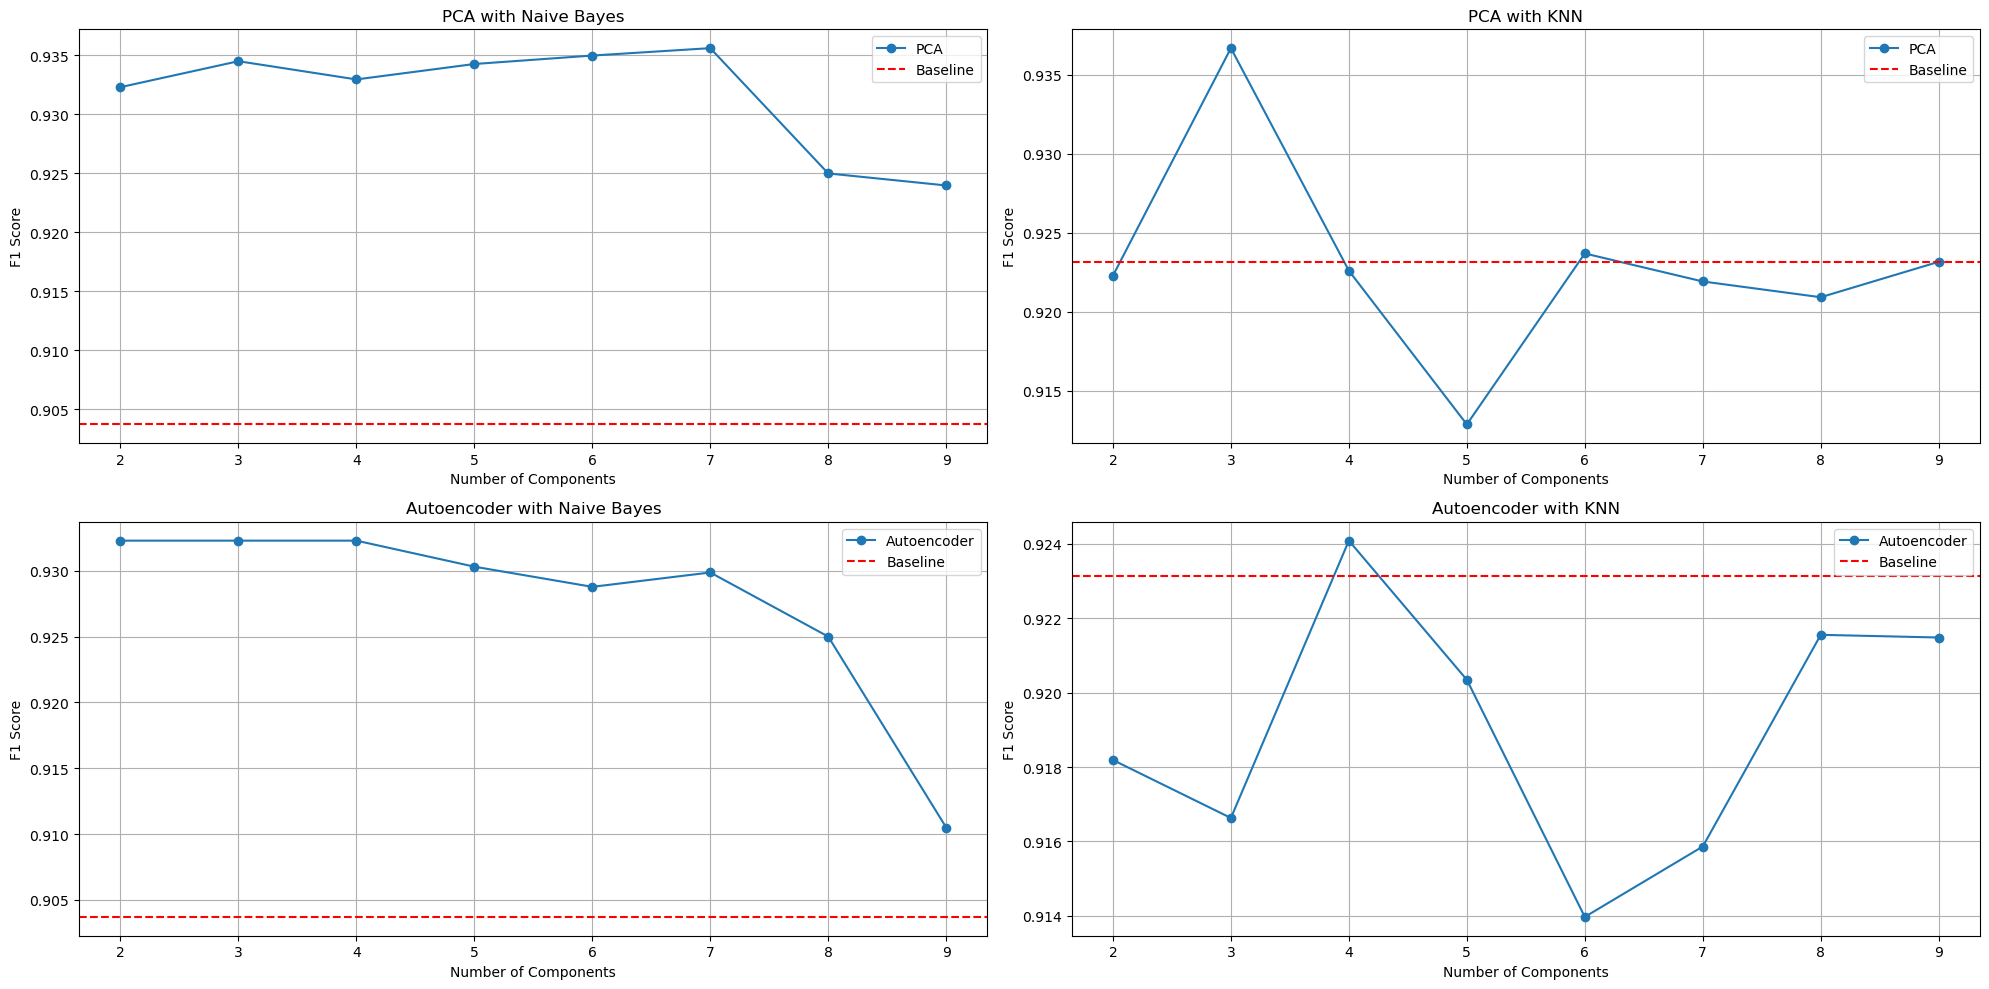

PCA max : 0.9366736256089075
AE max : 0.9322916666666667


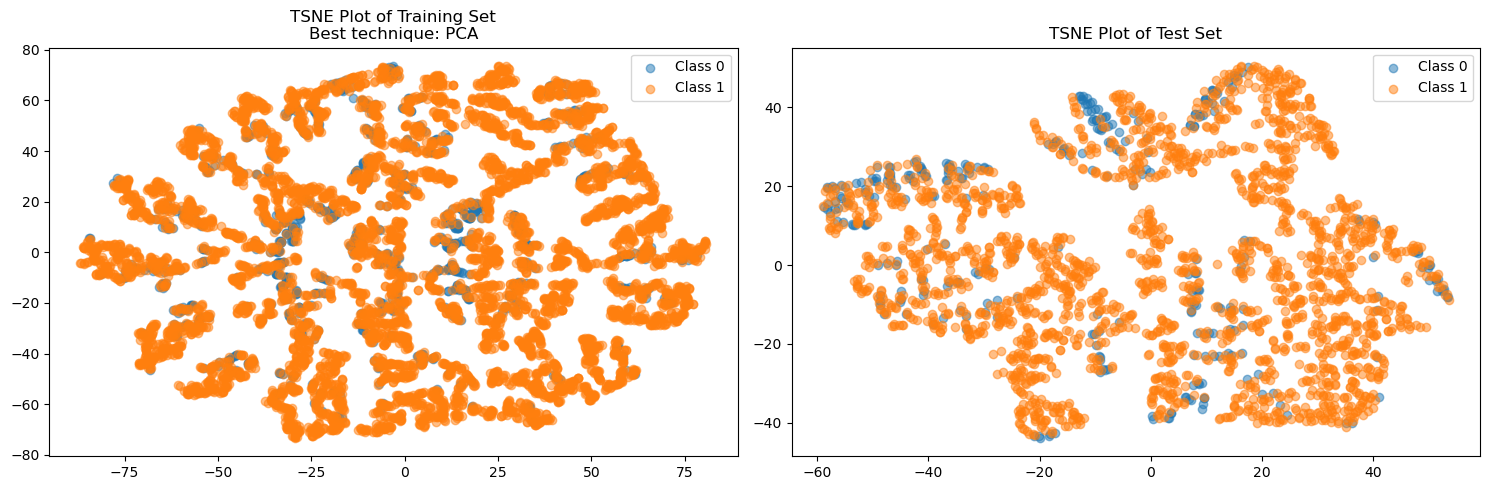

In [24]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to create and train autoencoder
def create_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    # Encoder
    encoded = Dense(encoding_dim * 2, activation='relu')(input_layer)
    encoded = Dense(encoding_dim, activation='relu')(encoded)
    # Decoder
    decoded = Dense(encoding_dim * 2, activation='relu')(encoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)
    
    # Full autoencoder
    autoencoder = Model(input_layer, decoded)
    # Encoder part
    encoder = Model(input_layer, encoded)
    
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

# Initialize lists to store results
dimensions = range(2, 10)
pca_f1_nb = []
pca_f1_knn = []
ae_f1_nb = []
ae_f1_knn = []

# Baseline performance
nb_baseline = GaussianNB()
knn_baseline = KNeighborsClassifier()
nb_baseline.fit(X_train_scaled, y_train)
knn_baseline.fit(X_train_scaled, y_train)
baseline_f1_nb = f1_score(y_test, nb_baseline.predict(X_test_scaled))
baseline_f1_knn = f1_score(y_test, knn_baseline.predict(X_test_scaled))

# Calculate F1 scores for different dimensions
for dim in dimensions:
    # PCA
    pca = PCA(n_components=dim)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    # Train and evaluate with NB
    nb = GaussianNB()
    nb.fit(X_train_pca, y_train)
    pca_f1_nb.append(f1_score(y_test, nb.predict(X_test_pca)))
    
    # Train and evaluate with KNN
    knn = KNeighborsClassifier()
    knn.fit(X_train_pca, y_train)
    pca_f1_knn.append(f1_score(y_test, knn.predict(X_test_pca)))
    
    # Autoencoder
    autoencoder, encoder = create_autoencoder(X_train_scaled.shape[1], dim)
    autoencoder.fit(X_train_scaled, X_train_scaled, 
                   epochs=50, batch_size=256, shuffle=True, verbose=0)
    
    # Transform data using trained encoder
    X_train_ae = encoder.predict(X_train_scaled)
    X_test_ae = encoder.predict(X_test_scaled)
    
    # Train and evaluate with NB
    nb = GaussianNB()
    nb.fit(X_train_ae, y_train)
    ae_f1_nb.append(f1_score(y_test, nb.predict(X_test_ae)))
    
    # Train and evaluate with KNN
    knn = KNeighborsClassifier()
    knn.fit(X_train_ae, y_train)
    ae_f1_knn.append(f1_score(y_test, knn.predict(X_test_ae)))

# Plotting
plt.figure(figsize=(20, 10))

# PCA with NB
plt.subplot(2, 2, 1)
plt.plot(list(dimensions), pca_f1_nb, marker='o', label='PCA')
plt.axhline(y=baseline_f1_nb, color='r', linestyle='--', label='Baseline')
plt.title('PCA with Naive Bayes')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

# PCA with KNN
plt.subplot(2, 2, 2)
plt.plot(list(dimensions), pca_f1_knn, marker='o', label='PCA')
plt.axhline(y=baseline_f1_knn, color='r', linestyle='--', label='Baseline')
plt.title('PCA with KNN')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

# AE with NB
plt.subplot(2, 2, 3)
plt.plot(list(dimensions), ae_f1_nb, marker='o', label='Autoencoder')
plt.axhline(y=baseline_f1_nb, color='r', linestyle='--', label='Baseline')
plt.title('Autoencoder with Naive Bayes')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

# AE with KNN
plt.subplot(2, 2, 4)
plt.plot(list(dimensions), ae_f1_knn, marker='o', label='Autoencoder')
plt.axhline(y=baseline_f1_knn, color='r', linestyle='--', label='Baseline')
plt.title('Autoencoder with KNN')
plt.xlabel('Number of Components')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Find best performing technique
pca_max = max(max(pca_f1_nb), max(pca_f1_knn))
ae_max = max(max(ae_f1_nb), max(ae_f1_knn))
best_technique = "PCA" if pca_max > ae_max else "Autoencoder"


print("PCA max :", pca_max)
print("AE max :", ae_max)

# Generate TSNE plots for best technique
if best_technique == "PCA":
    best_dim = dimensions[np.argmax([max(pca_f1_nb[i], pca_f1_knn[i]) for i in range(len(dimensions))])]
    pca = PCA(n_components=best_dim)
    X_train_reduced = pca.fit_transform(X_train_scaled)
    X_test_reduced = pca.transform(X_test_scaled)
else:
    best_dim = dimensions[np.argmax([max(ae_f1_nb[i], ae_f1_knn[i]) for i in range(len(dimensions))])]
    autoencoder, encoder = create_autoencoder(X_train_scaled.shape[1], best_dim)
    autoencoder.fit(X_train_scaled, X_train_scaled, epochs=50, batch_size=256, shuffle=True, verbose=0)
    X_train_reduced = encoder.predict(X_train_scaled)
    X_test_reduced = encoder.predict(X_test_scaled)

# TSNE for training set
tsne = TSNE(n_components=2, random_state=0)
X_train_tsne = tsne.fit_transform(X_train_reduced)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_tsne[y_train == 0, 0], X_train_tsne[y_train == 0, 1], 
           label='Class 0', alpha=0.5)
plt.scatter(X_train_tsne[y_train == 1, 0], X_train_tsne[y_train == 1, 1], 
           label='Class 1', alpha=0.5)
plt.title(f'TSNE Plot of Training Set\nBest technique: {best_technique}')
plt.legend()

# TSNE for test set
X_test_tsne = tsne.fit_transform(X_test_reduced)
plt.subplot(1, 2, 2)
plt.scatter(X_test_tsne[y_test == 0, 0], X_test_tsne[y_test == 0, 1], 
           label='Class 0', alpha=0.5)
plt.scatter(X_test_tsne[y_test == 1, 0], X_test_tsne[y_test == 1, 1], 
           label='Class 1', alpha=0.5)
plt.title('TSNE Plot of Test Set')
plt.legend()

plt.tight_layout()
plt.show()

## Part 4 - Feature Selection & Exploration

In [84]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


# Read the Excel file
df = pd.read_csv('MCSDatasetNEXTCONLab.csv')

'''Split into test-train sets'''

# Features and target
features = ['Latitude', 'Longitude', 'Hour', 'Minute', 'Duration', 
           'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
X = df[features]
y = df['Legitimacy']

# Split data based on Day values
X_train = X[df['Day'].isin([0, 1, 2])]
X_test = X[df['Day'] == 3]
y_train = y[df['Day'].isin([0, 1, 2])]
y_test = y[df['Day'] == 3]

t = MinMaxScaler()
X_train = t.fit_transform(X_train)
X_test = t.fit_transform(X_test)

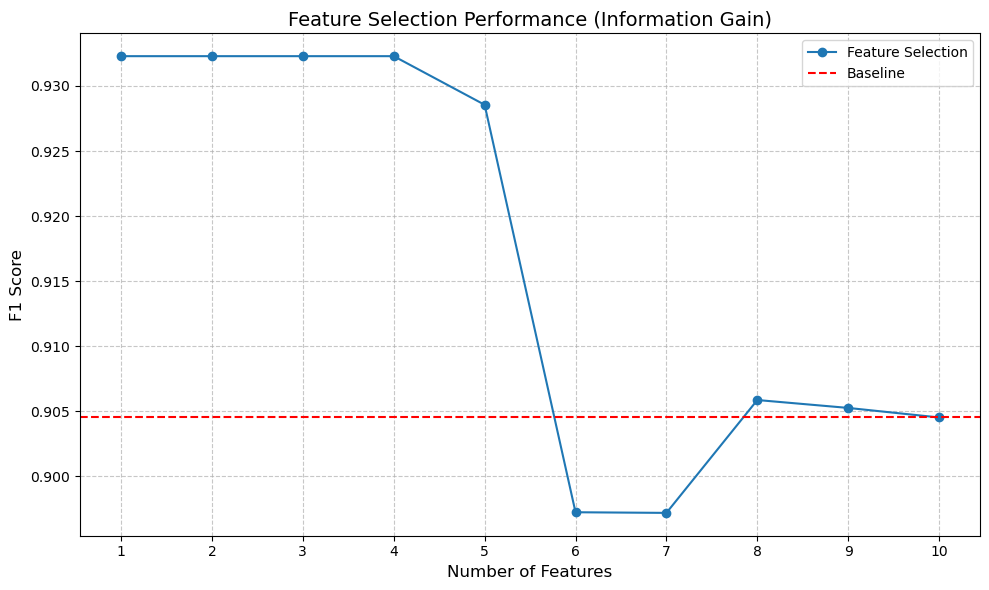


Results Summary:
--------------------------------------------------
Baseline F1 Score: 0.9045

Best F1 Score: 0.9323
Optimal number of features: 1
Optimal feature subset: ['GridNumber']

Feature Subsets and Performance:
--------------------------------------------------

1 features (F1: 0.9323):
['GridNumber']

2 features (F1: 0.9323):
['Latitude' 'GridNumber']

3 features (F1: 0.9323):
['Latitude' 'Longitude' 'GridNumber']

4 features (F1: 0.9323):
['Latitude' 'Longitude' 'Hour' 'GridNumber']

5 features (F1: 0.9286):
['Latitude' 'Longitude' 'Hour' 'Resources' 'GridNumber']

6 features (F1: 0.8972):
['Latitude' 'Longitude' 'Hour' 'Resources' 'OnPeakHours' 'GridNumber']

7 features (F1: 0.8972):
['Latitude' 'Longitude' 'Hour' 'Resources' 'Coverage' 'OnPeakHours'
 'GridNumber']

8 features (F1: 0.9059):
['Latitude' 'Longitude' 'Hour' 'Duration' 'Resources' 'Coverage'
 'OnPeakHours' 'GridNumber']

9 features (F1: 0.9053):
['Latitude' 'Longitude' 'Hour' 'Duration' 'RemainingTime' 'Resour

In [85]:
# Apply filter method: Information Gain & plot F1 vs #features

import numpy as np
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def select_feature(X_train, y_train, X_test, y_test, FSM, model):
    # Fit and transform with feature selection
    fs = FSM
    fs.fit(X_train, y_train)
    X_train_new = fs.transform(X_train)
    X_test_new = fs.transform(X_test)
    
    # Fit model and predict
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_test_new)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    
    # Get selected features
    selected_features = np.array(features)[fs.get_support()]
    
    return f1, selected_features

# Get baseline performance (without feature selection)
model = GaussianNB()
model.fit(X_train, y_train)
baseline_f1 = f1_score(y_test, model.predict(X_test))

# Test different numbers of features
f1_scores = {}
feature_sets = {}

for nf in range(1, len(features) + 1):
    fsm = SelectKBest(mutual_info_classif, k=nf)
    f1, selected_features = select_feature(X_train, y_train, X_test, y_test, fsm, model)
    f1_scores[nf] = f1
    feature_sets[nf] = selected_features

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(list(f1_scores.keys()), list(f1_scores.values()), marker='o', label='Feature Selection')
plt.axhline(y=baseline_f1, color='r', linestyle='--', label='Baseline')

plt.title("Feature Selection Performance (Information Gain)", fontsize=14)
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("F1 Score", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(range(1, len(features) + 1))

plt.tight_layout()
plt.show()

# Print results
print("\nResults Summary:")
print("-" * 50)
print(f"Baseline F1 Score: {baseline_f1:.4f}")
print(f"\nBest F1 Score: {max(f1_scores.values()):.4f}")
best_k = max(f1_scores, key=f1_scores.get)
print(f"Optimal number of features: {best_k}")
print(f"Optimal feature subset: {feature_sets[best_k]}")

# Print all feature subsets and their performance
print("\nFeature Subsets and Performance:")
print("-" * 50)
for k in sorted(f1_scores.keys()):
    print(f"\n{k} features (F1: {f1_scores[k]:.4f}):")
    print(feature_sets[k])


Best Feature Subset: ['Latitude', 'Longitude', 'Hour', 'Resources', 'Coverage', 'GridNumber']
Best F1 Score: 0.9333626566967231


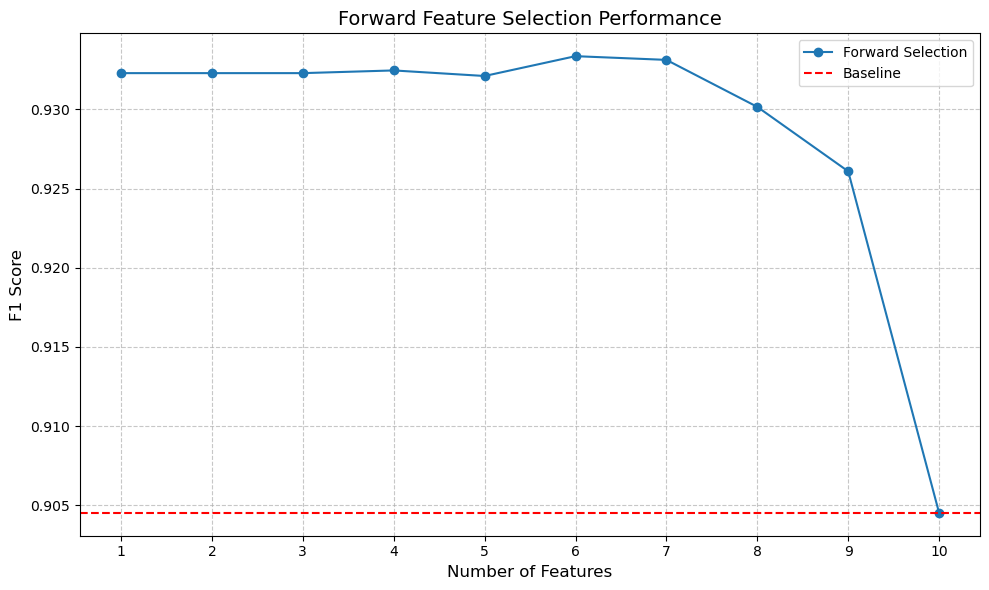

In [87]:
# Using Filter method (Forward Selection)

# Read the Excel file
df = pd.read_csv('MCSDatasetNEXTCONLab.csv')

'''Split into test-train sets'''

# Features and target
features = ['Latitude', 'Longitude', 'Hour', 'Minute', 'Duration', 
           'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
X = df[features]
y = df['Legitimacy']

# Split data based on Day values
X_train = X[df['Day'].isin([0, 1, 2])]
X_test = X[df['Day'] == 3]
y_train = y[df['Day'].isin([0, 1, 2])]
y_test = y[df['Day'] == 3]

t = MinMaxScaler()
X_train = t.fit_transform(X_train)
X_test = t.fit_transform(X_test)

# Initialize model

model = GaussianNB()

# Assuming X_train and X_test are already defined, and features are known
def forward_selection(X_train, y_train, X_test, y_test, model, feature_names):
    selected_features = []  # Initialize with no features selected
    f1_scores = {}
    feature_sets = {}
    best_f1 = -1  # Initialize best F1 score
    best_subset = []  # Initialize best subset

    remaining_features = list(range(X_train.shape[1]))  # Use indices for features

    while remaining_features:
        best_f1_current = -1
        best_feature = None
        best_subset_current = None

        # Try adding each feature one by one
        for feature in remaining_features:
            current_features = selected_features + [feature]
            # Select columns using indices
            X_train_subset = X_train[:, current_features]
            X_test_subset = X_test[:, current_features]
            
            # Train the model with the current set of features
            model.fit(X_train_subset, y_train)
            y_pred = model.predict(X_test_subset)
            
            current_f1 = f1_score(y_test, y_pred)

            # If this feature improves F1 score, select it
            if current_f1 > best_f1_current:
                best_f1_current = current_f1
                best_feature = feature
                best_subset_current = current_features

        if best_feature is not None:
            # Add the best feature to the list of selected features
            selected_features = best_subset_current
            remaining_features.remove(best_feature)
            f1_scores[len(selected_features)] = best_f1_current
            feature_sets[len(selected_features)] = [feature_names[i] for i in selected_features]
            
            # Update the best F1 and best subset if the current one is better
            if best_f1_current > best_f1:
                best_f1 = best_f1_current
                best_subset = [feature_names[i] for i in selected_features]

    return f1_scores, feature_sets, best_f1, best_subset

# Perform forward feature selection with column indices
f1_scores, feature_sets, best_f1, best_subset = forward_selection(X_train, y_train, X_test, y_test, model, features)

# Print the best feature subset and its F1 score
print("\nBest Feature Subset:", best_subset)
print("Best F1 Score:", best_f1)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(list(f1_scores.keys()), list(f1_scores.values()), marker='o', label='Forward Selection')
plt.axhline(y=baseline_f1, color='r', linestyle='--', label='Baseline')

plt.title("Forward Feature Selection Performance", fontsize=14)
plt.xlabel("Number of Features", fontsize=12)
plt.ylabel("F1 Score", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(range(1, len(f1_scores) + 1))

plt.tight_layout()
plt.show()

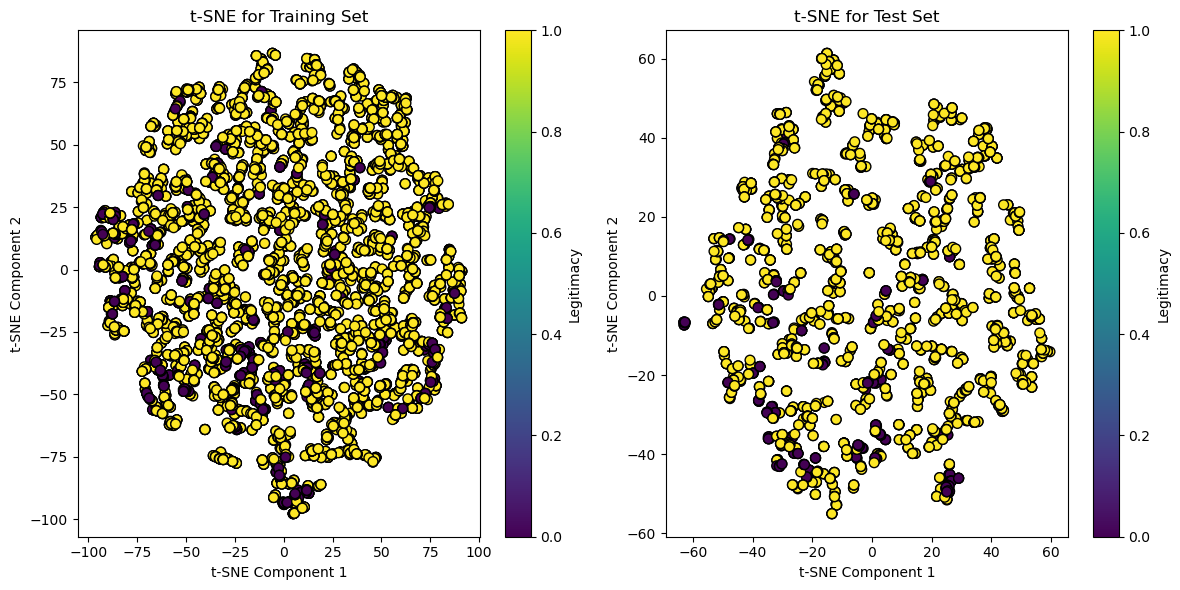

In [90]:
# Plotting TSNE for the best reduction set obtained using Forward Feature Selection

df = pd.read_csv('MCSDatasetNEXTCONLab.csv')

'''Split into test-train sets'''

# Features and target
features = ['Latitude', 'Longitude', 'Hour', 'Minute', 'Duration', 
           'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber']
X = df[features]
y = df['Legitimacy']

# Split data based on Day values
X_train = X[df['Day'].isin([0, 1, 2])]
X_test = X[df['Day'] == 3]
y_train = y[df['Day'].isin([0, 1, 2])]
y_test = y[df['Day'] == 3]

t = MinMaxScaler()
X_train = t.fit_transform(X_train)
X_test = t.fit_transform(X_test)

best_subset = ['Latitude', 'Longitude', 'Hour', 'Resources', 'Coverage', 'GridNumber']

# Apply t-SNE to the best feature subset for training set
def plot_tsne(X_train, y_train, X_test, y_test, best_subset, feature_names):
    selected_features_indices = [feature_names.index(feature) for feature in best_subset]
    
    # Select the corresponding features for training and testing
    X_train_subset = X_train[:, selected_features_indices]
    X_test_subset = X_test[:, selected_features_indices]

    # Apply t-SNE to the training set
    tsne_train = TSNE(n_components=2, random_state=42)
    X_train_tsne = tsne_train.fit_transform(X_train_subset)

    # Apply t-SNE to the test set (using the same trained model)
    tsne_test = TSNE(n_components=2, random_state=42)
    X_test_tsne = tsne_test.fit_transform(X_test_subset)

    # Plotting the training set t-SNE plot
    plt.figure(figsize=(12, 6))

    # Plot for training set
    plt.subplot(1, 2, 1)
    scatter_train = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
    plt.title("t-SNE for Training Set")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.colorbar(scatter_train, label="Legitimacy")
    
    # Plot for test set
    plt.subplot(1, 2, 2)
    scatter_test = plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap='viridis', edgecolor='k', s=50)
    plt.title("t-SNE for Test Set")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.colorbar(scatter_test, label="Legitimacy")

    plt.tight_layout()
    plt.show()

# Assuming X_train, X_test, y_train, y_test, and best_subset are defined
plot_tsne(X_train, y_train, X_test, y_test, best_subset, features)

## Part 5: Clustering of Geographic Features